In [150]:
import pandas as pd

In [151]:
df = pd.read_csv('california_housing.csv')

In [152]:
#Identify shape, size of the raw data (1 point)
#shape of data: (20634, 9).
#size of data: 1.8M.
#-rw-r--r-- 1 root root 1.8M Mar 13 03:38 california_housing.csv

In [153]:
df.shape

(20634, 9)

In [154]:
#Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)
#changed most variables to 'category' type, irradiat needs to be bool because it only takes yes and no.
#checked for duplicate rows and columns.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [156]:
df.duplicated().sum()

0

In [157]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [158]:
df.duplicated().sum()

0

In [159]:
#Get the statistical information (mean, median, etc.) for all variables and derive 
#meaniful insights from it. Comment if you see any anamolies in the data. (1 point)

#anomolies:
#There are no missing values (as each column has 20634 non-null entries).
#The ranges for the continuous variables appear reasonable for housing data.
#No outliers or extreme values are immediately apparent.

In [160]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [161]:
df.median()

MedInc                   3.534950
HouseAge                29.000000
AveRooms                 5.229190
AveBedrms                1.048780
Population            1166.000000
AveOccup                 2.817937
Latitude                34.260000
Longitude             -118.490000
price_above_median       0.500000
dtype: float64

In [162]:
#Visualize the dataset through different univariate analysis and comment on your observations.
#MedInc: The histogram for median income may show a right-skewed distribution, indicating that while most observations fall in a lower income range, there are some areas with significantly higher incomes.
#HouseAge: The distribution of house ages can indicate whether most homes are relatively new or older. A concentrated histogram might suggest a period of rapid development.
#AveRooms & AveBedrms: These variables show the average number of rooms and bedrooms per household. A right-skew or a bell-shaped distribution can provide insights into housing design patterns.
#Population: This variable might exhibit heavy skewness if a few neighborhoods have very high populations compared to others.
#AveOccup: The average occupancy per household can hint at household sizes, with possible clustering around typical values.
#Latitude & Longitude: Histograms for these variables help identify the geographic spread of the dataset. They should lie within expected bounds for the region represented.

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

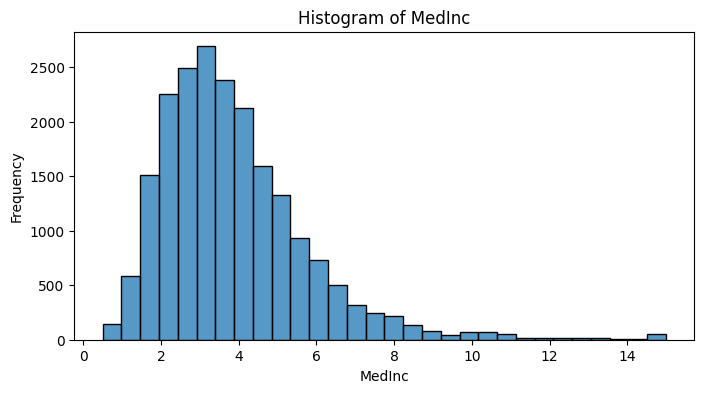

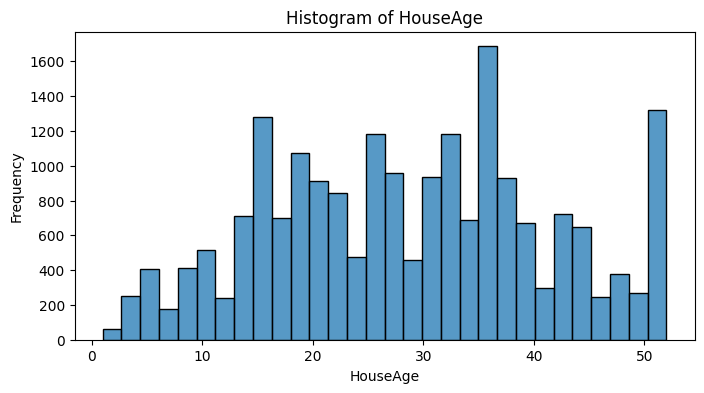

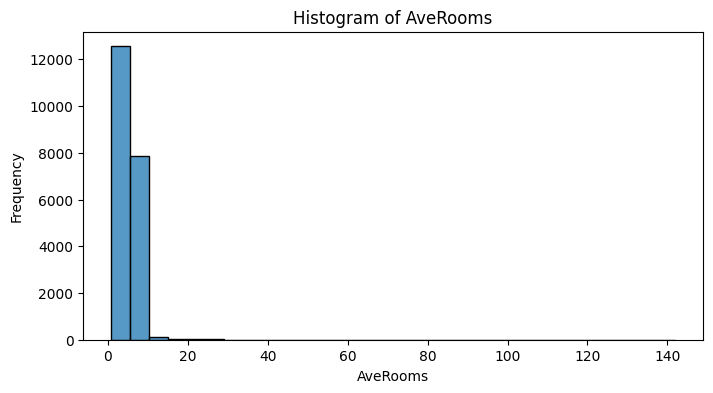

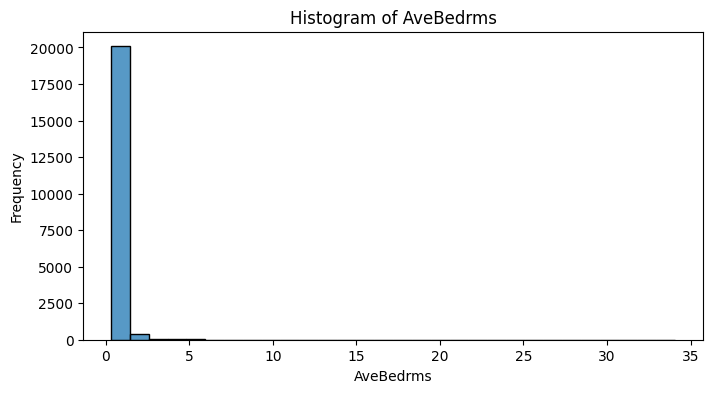

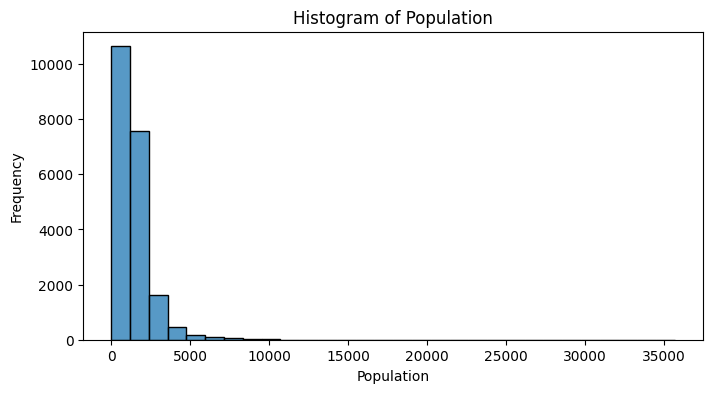

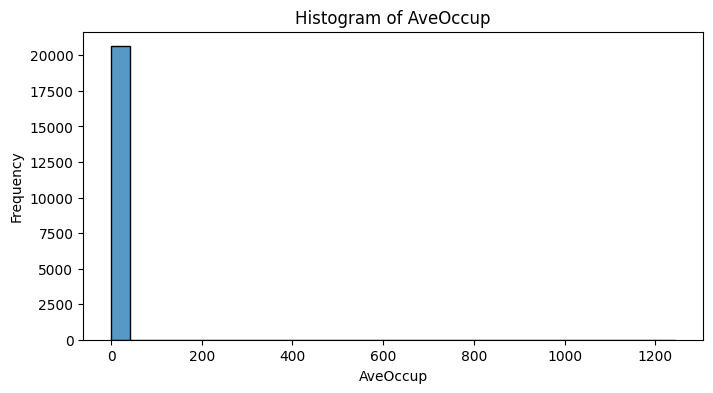

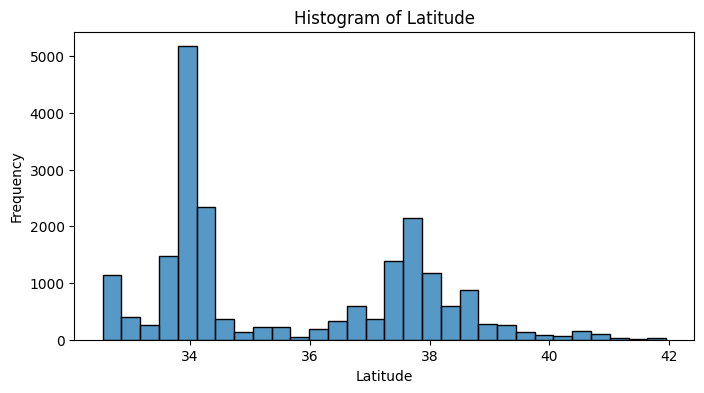

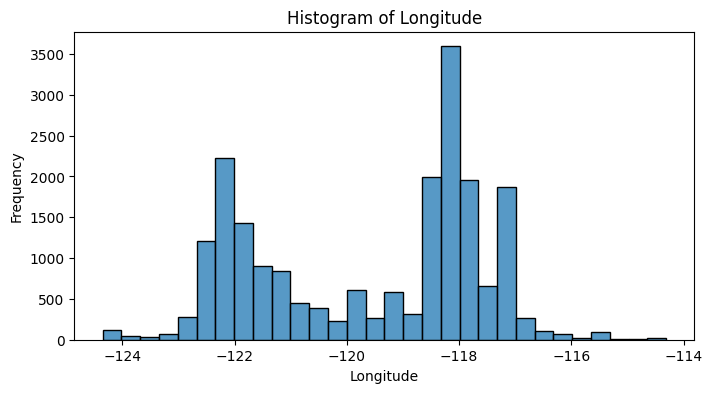

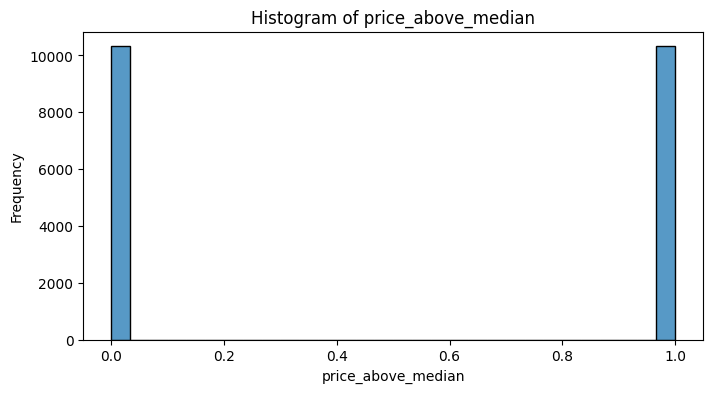

In [164]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [165]:
#Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 points)

In [166]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = df.drop(columns=['price_above_median'])
y = df['price_above_median']

# Split the dataset into training and testing sets with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)

In [167]:
X_train.shape

(14443, 8)

In [168]:
X_test.shape

(6191, 8)

In [169]:
#Perform classification using below supervised learning techniques. When appropriate, use a hyperparameter space search to find optimal hyperparameter setting. Consider using other techniques from class lectures, such as data standardization. At a minimum, you should try the following model algorithms. We will base the grading on the quality of your model(s) you develop. (5 points)








In [180]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [171]:
#K-nearnest neighbor

In [183]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Baseline KNN with n_neighbors=3
pipeline_knn.set_params(knn__n_neighbors=3)
pipeline_knn.fit(X_train, y_train)

print("Baseline KNN Performance")
print("==========================")
print("Test Data Performance:")
print(classification_report(y_test, pipeline_knn.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, pipeline_knn.predict(X_train)))

# ---------------------------
# Hyperparameter Tuning for KNN
# ---------------------------
# Grid search over n_neighbors from 1 to 99
param_grid = {"knn__n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(pipeline_knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print("\nBest KNN Parameters:")
print(knn_gscv.best_params_)

best_knn = knn_gscv.best_estimator_
print("\nOptimized KNN Performance")
print("===========================")
print("Test Data Performance:")
print(classification_report(y_test, best_knn.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, best_knn.predict(X_train)))

Baseline KNN Performance
Test Data Performance:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3095
           1       0.83      0.83      0.83      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191


Train Data Performance:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7222
           1       0.91      0.91      0.91      7221

    accuracy                           0.91     14443
   macro avg       0.91      0.91      0.91     14443
weighted avg       0.91      0.91      0.91     14443


Best KNN Parameters:
{'knn__n_neighbors': 13}

Optimized KNN Performance
Test Data Performance:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3095
           1       0.83      0.84      0.84      3096

    accuracy

In [ ]:
#Decision Tree Classifier

Test Data Performance:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.83      6191
   macro avg       0.83      0.83      0.83      6191
weighted avg       0.83      0.83      0.83      6191


Train Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



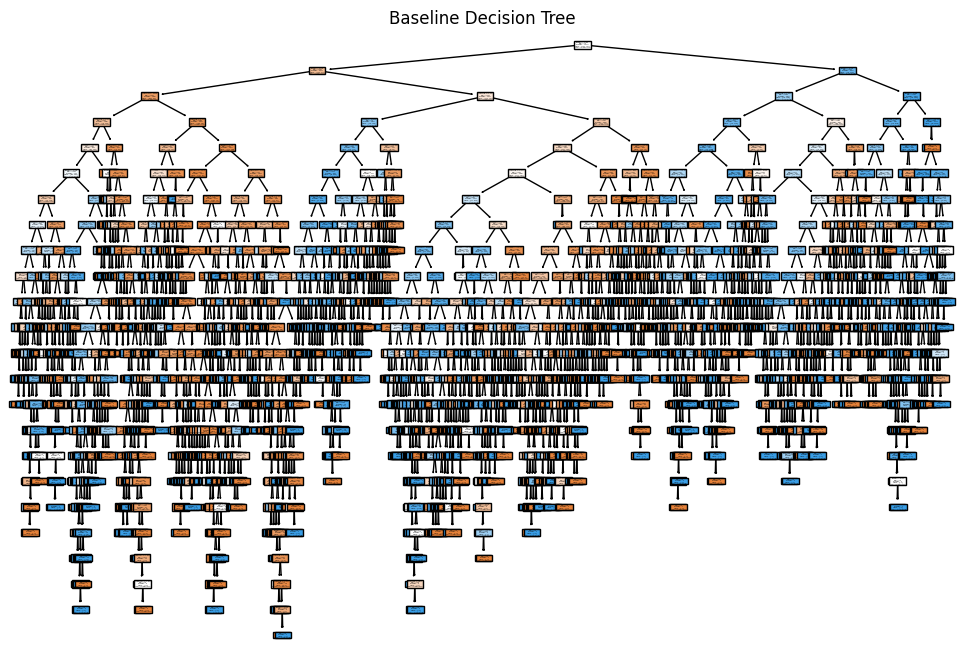


Best Decision Tree Parameters:
{'max_depth': 10, 'min_samples_split': 2}

Optimized Decision Tree Performance
Test Data Performance:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3095
           1       0.85      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191


Train Data Performance:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7222
           1       0.93      0.90      0.92      7221

    accuracy                           0.92     14443
   macro avg       0.92      0.92      0.92     14443
weighted avg       0.92      0.92      0.92     14443



In [182]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)

print("Test Data Performance:")
print(classification_report(y_test, dt_model.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, dt_model.predict(X_train)))

plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Below Median", "Above Median"])
plt.title("Baseline Decision Tree")
plt.show()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_gscv = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5)
dt_gscv.fit(X_train, y_train)
print("\nBest Decision Tree Parameters:")
print(dt_gscv.best_params_)

best_dt = dt_gscv.best_estimator_
print("\nOptimized Decision Tree Performance")
print("=====================================")
print("Test Data Performance:")
print(classification_report(y_test, best_dt.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, best_dt.predict(X_train)))

In [ ]:
#Random Forest Classifier

In [188]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_grid_rf = {
   "n_estimators": np.arange(start=10, stop=100, step=10),  
   "max_depth": [5, 10, 15, None],                          
   "min_samples_leaf": [1, 2, 3],                            
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.3, 1: 0.7}],     
}

rf = RandomForestClassifier(random_state=1)

random_search_rf = RandomizedSearchCV(
    rf, 
    param_grid_rf, 
    cv=3, 
    n_iter=20, 
    n_jobs=-1,  # use all available cores
    scoring="accuracy", 
    random_state=1
)
random_search_rf.fit(X_train, y_train)

print("Random Forest Best Parameters:")
print(random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_
print("\nRandom Forest - Optimized Performance")
print("=======================================")
print("Test Data Performance:")
print(classification_report(y_test, best_rf.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, best_rf.predict(X_train)))

Random Forest Best Parameters:
{'n_estimators': 50, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': {0: 0.3, 1: 0.7}}

Random Forest - Optimized Performance
Test Data Performance:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3095
           1       0.90      0.88      0.89      3096

    accuracy                           0.89      6191
   macro avg       0.89      0.89      0.89      6191
weighted avg       0.89      0.89      0.89      6191


Train Data Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7222
           1       1.00      1.00      1.00      7221

    accuracy                           1.00     14443
   macro avg       1.00      1.00      1.00     14443
weighted avg       1.00      1.00      1.00     14443



In [ ]:
#AdaBoost Classifier

In [187]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

decision_tree_stump = DecisionTreeClassifier(max_depth=1)

param_grid_ada = {
   'learning_rate': [0.1, 0.5, 1.0],
   'n_estimators': [50, 100, 200]
}

ada = AdaBoostClassifier(estimator=decision_tree_stump, random_state=42)

grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=3, n_jobs=8, scoring="accuracy")
grid_search_ada.fit(X_train, y_train)

print("AdaBoost Best Parameters:")
print(grid_search_ada.best_params_)

best_ada = grid_search_ada.best_estimator_
print("\nAdaBoost - Optimized Performance")
print("==================================")
print("Test Data Performance:")
print(classification_report(y_test, best_ada.predict(X_test)))
print("\nTrain Data Performance:")
print(classification_report(y_train, best_ada.predict(X_train)))

AdaBoost Best Parameters:
{'learning_rate': 1.0, 'n_estimators': 200}

AdaBoost - Optimized Performance
Test Data Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3095
           1       0.87      0.88      0.88      3096

    accuracy                           0.88      6191
   macro avg       0.88      0.88      0.88      6191
weighted avg       0.88      0.88      0.88      6191


Train Data Performance:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7222
           1       0.89      0.89      0.89      7221

    accuracy                           0.89     14443
   macro avg       0.89      0.89      0.89     14443
weighted avg       0.89      0.89      0.89     14443



In [ ]:
#Print report showing accuracy, recall, precision and f1-score for each classification model on all data (training, testing, etc.). Which metric is most important for this problem? (You will explain your answer in the report in Part 3). 

#The most important measure is accuracy

In [ ]:
#Print confusion matrix for each model.

KNN Confusion Matrix (Test Data):
[[2575  520]
 [ 496 2600]]


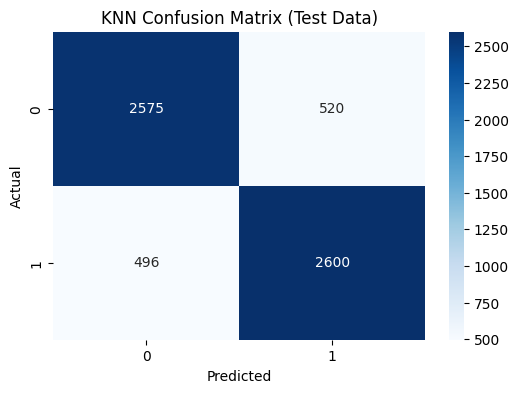

KNN Confusion Matrix (Train Data):
[[6223  999]
 [1004 6217]]


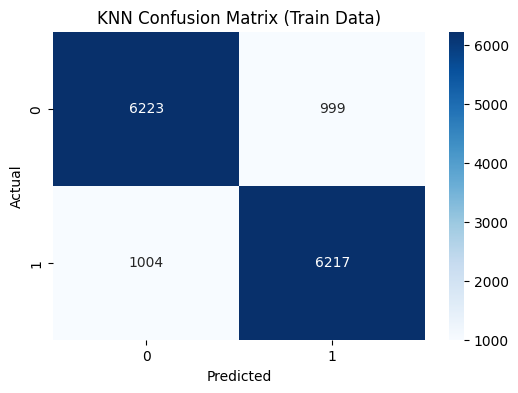

Decision Tree Confusion Matrix (Test Data):
[[2621  474]
 [ 489 2607]]


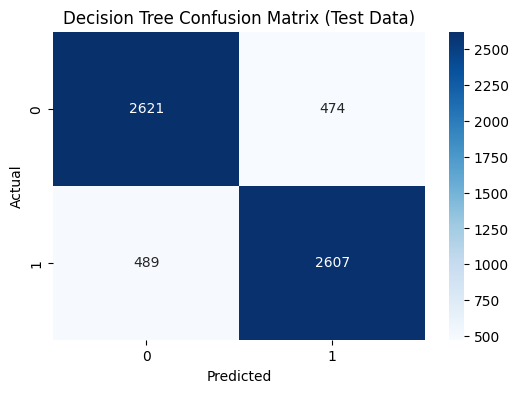

Decision Tree Confusion Matrix (Train Data):
[[6717  505]
 [ 695 6526]]


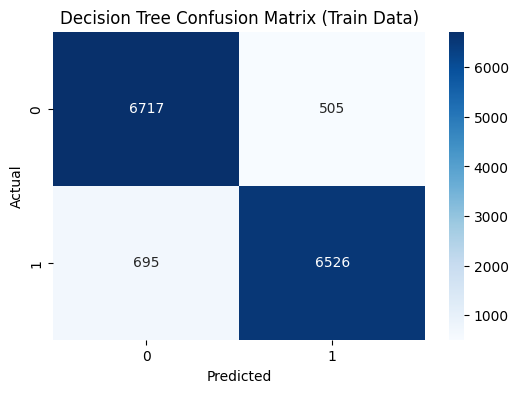

Random Forest Confusion Matrix (Test Data):
[[2780  315]
 [ 383 2713]]


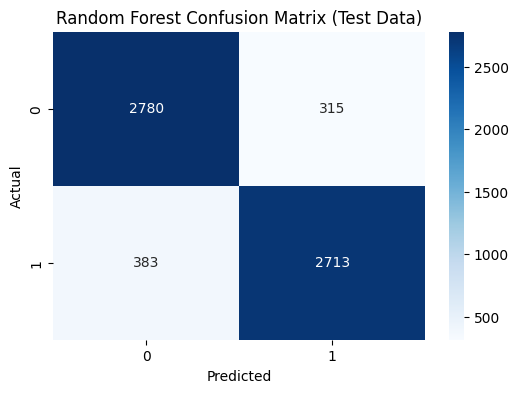

Random Forest Confusion Matrix (Train Data):
[[7222    0]
 [   2 7219]]


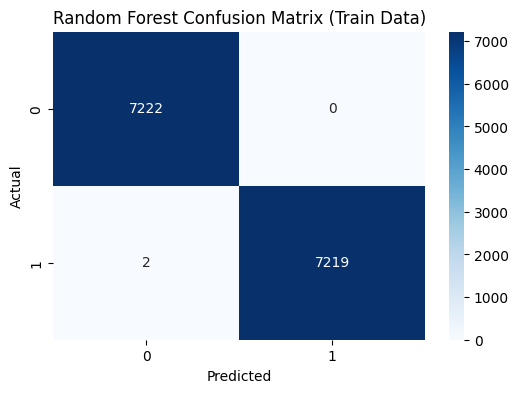

AdaBoost Confusion Matrix (Test Data):
[[2692  403]
 [ 361 2735]]


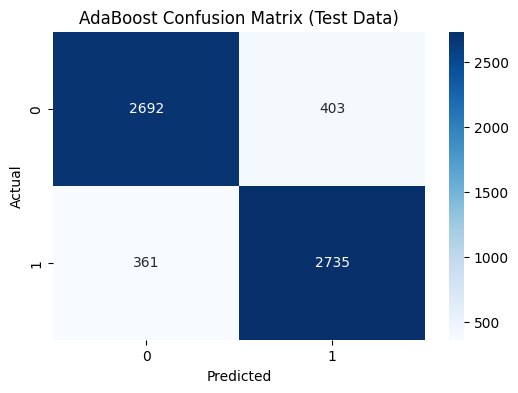

AdaBoost Confusion Matrix (Train Data):
[[6394  828]
 [ 804 6417]]


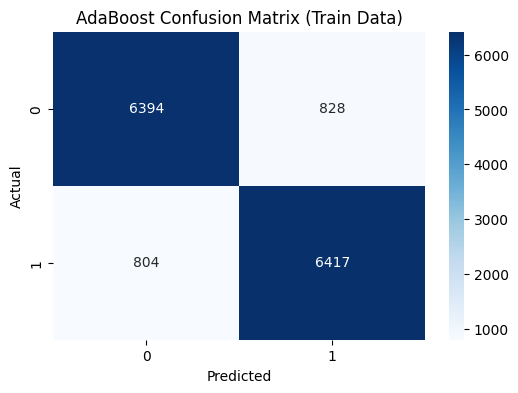

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dictionary to hold our models and their names
models = {
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "AdaBoost": best_ada
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Loop through each model and print confusion matrices for test and train data
for name, model in models.items():
    # Test data confusion matrix
    cm_test = confusion_matrix(y_test, model.predict(X_test))
    print(f"{name} Confusion Matrix (Test Data):")
    print(cm_test)
    plot_confusion_matrix(cm_test, f"{name} Confusion Matrix (Test Data)")
    
    # Train data confusion matrix
    cm_train = confusion_matrix(y_train, model.predict(X_train))
    print(f"{name} Confusion Matrix (Train Data):")
    print(cm_train)
    plot_confusion_matrix(cm_train, f"{name} Confusion Matrix (Train Data)")